<a href="https://colab.research.google.com/github/ralph27/ZAKA-hands-on/blob/master/Neural_Networks_in_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks in Action
© 2024, Zaka AI, Inc. All Rights Reserved.

---


**Objective:** This notebook consists of two parts.
- In part A, we will delve into Neural Networks by solving different classification tasks. We will see both binary and multi-classification with different datasets and learn new techniques to deal with our dataset.

- Part B covers a regression task and how data preprocessing techniques such as standardization affect the model's performcace. We will also try wider and deeper model architectures on the same dataset so we compare the results.

# Part A: Binary and Multi-class classification
**Objective:** Part A is comprised of two independent exercises: The first being both a multi-classication with body performance data and a binary classification with sonar data. The objective of the first exercise is to prepare data for a multiclassification model and training it. For the second, We will train and evaluate a binary classification model and learn how to apply standardization on a dataset and create a pipeline for evaluation of models.

## Multi-class classification with Body Performance Dataset

### 1. Load data

In this notebook, we are going to use the [**Body Performance** dataset](https://www.kaggle.com/datasets/kukuroo3/body-performance-data). This is a dataset that consists of information about different people and their physical bodies' performance. Each instance describes the properties of a person.

This is a multi-class classification problem, meaning that there are more than two classes to be predicted, in fact there are four different types of performance.

The variables can be summarized as follows:

**Input Variables (X):**


1. Age
2. Gender
3. Height in cm
4. Weight in kg
5. Body fat in %
6. Diastolic blood pressure
7. Systolic blood pressure
8. Grip Force
9. Sit and bend forward in cm
10. Sit-ups count
11. Broad jump in cm

**Output Variable (Y):**

*   Class (Body performance):
 - A, B, C, D, where is the best performance




Let's start by loading our csv file and storing into a variable called dataframe. Then let's print the head of this dataframe.

In [ ]:
import pandas as pd

dataframe = pd.read_csv("bodyPerformance.csv")
dataframe.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### 2. Mapping categorical columns
Now we map all categorical columns to numerical values so they can be utilized.

Let's see which variables need to be transformed

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


We can see that gender and class are the only columns of type object, so let's map their values!

In [ ]:
import pandas as pd

# Define the mapping
mapping_class = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
mapping_gender = {'M': 0, 'F': 1}

# Replace values in the 'category' column
dataframe['class'] = dataframe['class'].replace(mapping_class)
dataframe['gender'] = dataframe['gender'].replace(mapping_gender)

Let's check if it was succesful!

In [ ]:
dataframe.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


Let's split our data between inputs and outputs before the next step

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Y = dataframe.iloc[:, -1]  # The last column is the target variable
X = dataframe.iloc[:, :-1].astype(int)  # All columns except the last one

Let's also normalize it

In [ ]:
# Normalize all columns in the DataFrame
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Let's finally split it into training and test sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 3. Defining the Keras Model
Create a Keras Sequential model that has an input layer, 2 hidden layers, with the relu activation function, and a dropout layer. Note that you will not get a best performing model.

We should define a create_model() funtion that will create the model, compile it and return it.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, BatchNormalization

# Define a model with different layers
def create_model():
    # Create model
    model = Sequential()

    # Input layer
    model.add(Dense(11, input_dim=11, activation='relu'))

    # # Hidden layers
    model.add(Dense(256, activation='relu')) #256
    model.add(Dense(64, activation='relu')) #64

    # Output layer
    model.add(Dense(4, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


Let's now fit the model on the training set, while also making predictions so that we can plot different metrics.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

model = create_model()

# Fit the model on the training set
history = model.fit(X_train, Y_train, epochs=20, batch_size=4)

# Make predictions on the test set
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

Epoch 1/20
2679/2679 [==============================] - 7s 2ms/step - loss: 1.0598 - accuracy: 0.5066
Epoch 2/20
2679/2679 [==============================] - 6s 2ms/step - loss: 0.9326 - accuracy: 0.5763
Epoch 3/20
2679/2679 [==============================] - 5s 2ms/step - loss: 0.8930 - accuracy: 0.5957
Epoch 4/20
2679/2679 [==============================] - 5s 2ms/step - loss: 0.8652 - accuracy: 0.6106
Epoch 5/20
2679/2679 [==============================] - 6s 2ms/step - loss: 0.8516 - accuracy: 0.6231
Epoch 6/20
2679/2679 [==============================] - 5s 2ms/step - loss: 0.8415 - accuracy: 0.6271
Epoch 7/20
2679/2679 [==============================] - 6s 2ms/step - loss: 0.8272 - accuracy: 0.6319
Epoch 8/20
2679/2679 [==============================] - 5s 2ms/step - loss: 0.8115 - accuracy: 0.6372
Epoch 9/20
2679/2679 [==============================] - 6s 2ms/step - loss: 0.7974 - accuracy: 0.6495
Epoch 10/20
2679/2679 [==============================] - 6s 2ms/step - loss: 0.783

We want to print the training's accuracy and loss history, the confusion matrix and the confusion matrix.

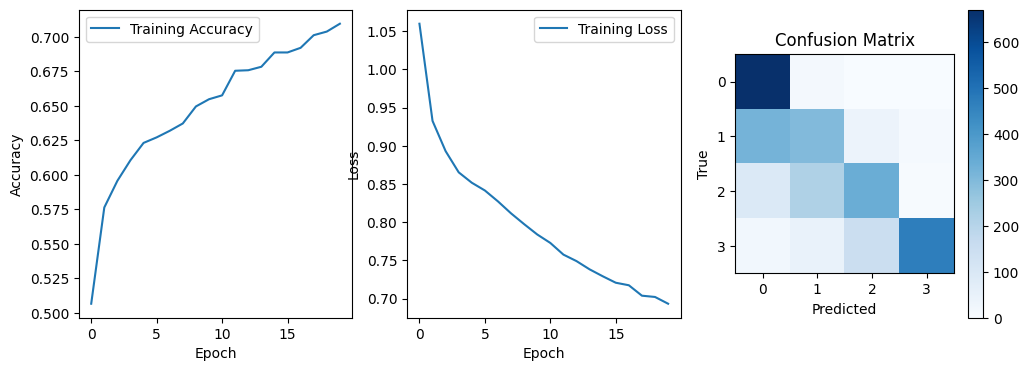

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Confusion Matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(Y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(Y))), np.unique(Y))
plt.yticks(np.arange(len(np.unique(Y))), np.unique(Y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Finally we print the classification report

In [ ]:
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       685
           1       0.52      0.45      0.48       662
           2       0.64      0.52      0.57       650
           3       0.97      0.68      0.80       682

    accuracy                           0.66      2679
   macro avg       0.69      0.66      0.65      2679
weighted avg       0.69      0.66      0.65      2679



Depending on the model you created, you will get different score results to analyze

## Binary Classification with Sonar Dataset

### 1. Load dataset

The dataset we will use in this tutorial is the [Sonar dataset](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)).

This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders.

It is a well-understood dataset. All of the variables are continuous and generally in the range of 0 to 1. The output variable is a string “M” for mine and “R” for rock, which will need to be converted to integers 1 and 0.

In [ ]:
# Binary Classification with Sonar Dataset: Baseline

from pandas import read_csv
# load dataset
dataframeSonar = read_csv("sonar.csv", header=None)
datasetSonar = dataframeSonar.values

# split into input (X) and output (Y) variables
X = datasetSonar[:,0:60].astype(float)
Y = datasetSonar[:,60]

We will split the dataset into training and testing so we can perform different metric visualizations

In [ ]:
# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 2. Encode output variable


In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

### 3. Define Keras Model

Create a Keras model with 1 hidden layer of size 60 and 1 output layer. The layers should have a 'normal' initialization of weights.

Compile the model with adam optimizer.

We should define a `baseline_model()` funtion that will create the model, compile it and return it.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

	return model

### 4. Evaluate model

Evaluate the model using stratified cross validation in the scikit-learn framework. Number of splits should be 5.

In [ ]:
!pip install scikeras

import warnings

# Suppress the warnings
warnings.filterwarnings("ignore", category=UserWarning, module="scikeras.wrappers")

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report

# evaluate model with dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)

# Perform cross-validation and calculate different metrics
results_accuracy = cross_val_score(estimator, X, encoded_Y, cv=kfold, scoring=scoring['accuracy'])
results_precision = cross_val_score(estimator, X, encoded_Y, cv=kfold, scoring=scoring['precision'])
results_recall = cross_val_score(estimator, X, encoded_Y, cv=kfold, scoring=scoring['recall'])
results_f1 = cross_val_score(estimator, X, encoded_Y, cv=kfold, scoring=scoring['f1'])

# Print the mean and standard deviation of the cross-validated results for each metric
print("---------------------------")
print(f"Accuracy: {results_accuracy.mean():.2f} (+/- {results_accuracy.std():.2f})")
print(f"Precision: {results_precision.mean():.2f} (+/- {results_precision.std():.2f})")
print(f"Recall: {results_recall.mean():.2f} (+/- {results_recall.std():.2f})")
print(f"F1 Score: {results_f1.mean():.2f} (+/- {results_f1.std():.2f})")
print("---------------------------")

# Print the classification report
estimator.fit(X, encoded_Y)
Y_pred = estimator.predict(X)
print("Classification Report:\n", classification_report(encoded_Y, Y_pred))


---------------------------
Accuracy: 0.83 (+/- 0.03)
Precision: 0.82 (+/- 0.04)
Recall: 0.81 (+/- 0.04)
F1 Score: 0.81 (+/- 0.05)
---------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       111
           1       0.96      0.93      0.94        97

    accuracy                           0.95       208
   macro avg       0.95      0.95      0.95       208
weighted avg       0.95      0.95      0.95       208



Let's now run the model again but this time only getting the Baseline score so we can compare it with the next steps

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier


# evaluate model with dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 80.22% (6.89%)


## Apply Standardization on Dataset

An effective data preparation scheme for tabular data when building neural network models is **standardization**. This is where the data is rescaled such that the mean value for each attribute is 0 and the standard deviation is 1. This preserves Gaussian and Gaussian-like distributions whilst normalizing the central tendencies for each attribute.

We can use scikit-learn to perform the standardization of our Sonar dataset using the `StandardScaler` class.

## Create a pipeline

The Scikit-learn pipeline is a wrapper that executes one or more models within a pass of the cross-validation procedure. Here, we can define a pipeline with the StandardScaler followed by our neural network model.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)

### Evaluate model

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 84.62% (4.39%)


# Part B: Regression

**Objective:** In this notebook exercise, we will work in the Life Expectancy dataset to predict through regression the expectancy of someone's life.
We will load the data, create a baseline model, train and evaluate it to predict with it and finally alter the performance of our model by standardizing our dataset and trying out wider and/or deeper network topologies.

## Regression with Life Expectancy dataset

### 1. Load data

In this notebook, we are going to use the [**Life Expectancy** dataset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) by the WHO.

The World Health Organization's Global Health Observatory (GHO) data repository tracks health status and related factors for 193 countries. Publicly available datasets, including life expectancy and health factors, were collected from the WHO repository and economic data from the United Nations. After merging and addressing missing values, the final dataset, comprising 22 columns and 2938 rows, focuses on critical health-related factors for analysis from the years 2000 to 2015 across 193 countries.



In [ ]:
from pandas import read_csv

# load dataset
dataframe = read_csv("life_exp_data.csv")
dataset = dataframe.values

# Swap the positions of columns
columns = dataframe.columns.tolist()
columns = [columns[3]] + columns[:3] + columns[4:]

# Reassign the columns to the DataFrame
dataframe = dataframe[columns]

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Country                          2938 non-null   object 
 2   Year                             2938 non-null   int64  
 3   Status                           2938 non-null   object 
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

From the above information, we want now to get the mean of each numeric column, and fill the null values in the dataset

In [ ]:
# Identify columns of type float and int
numeric_columns = dataframe.select_dtypes(include=['float', 'int']).columns

# Replace null values with the mean for each numeric column
for column in numeric_columns:
    mean_value = dataframe[column].mean()
    dataframe[column].fillna(mean_value, inplace=True)

Now we will Label Encode all columns of type object, so that the algorithm can use them

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify columns of type object
object_columns = dataframe.select_dtypes(include=['object']).columns

# Apply label encoding to each object column
label_encoder = LabelEncoder()
for column in object_columns:
    dataframe[column] = label_encoder.fit_transform(dataframe[column])


Let's split betwen input and output (X and Y)

In [ ]:
# Split into input (X) and output (Y) variables
Y = dataframe.iloc[:, 0]  # First column becomes Y
X = dataframe.iloc[:, 1:]  # Remaining columns become X

### 2. Define Base Model

Create a Keras model with 1 hidden layer (size = input layer size).

We should define a `baseline_model()` funtion that will create the model, compile it and return it.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def baseline_model():
    model = Sequential()

    # Input layer
    model.add(Dense(21, input_dim=21, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model


### 3. Evaluate baseline model

Evaluate the model using stratified cross validation in the scikit-learn framework. Number of splits should be 10. For simplicity we will not print all the metrics scores, but try it yourself!

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -132363656.18 (358830561.63) MSE


## Lift Performance By Standardizing The Dataset
Standardizing the dataset referes to transforming all datapoints values to the range of 0 to 1. This is done using `scikit-learn`'s StandardScaler. We will also build a pipeline which will call the function creating the model, then compile and training it. The last step is to evaluate the performance of the model using cross-validation. This will show us whether standardizing a dataset betters the performance of a deep learning model.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standarized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standarized: 0.47 (0.10) MSE


## Tune The Neural Network Topology
We can alter the architecture of the hidden layers of the neural network to observe changes in the results we get.

### Evaluate a wider network
A wider network is a network where the hidden layer has more neurons than it previously had. Let's create a network which has 35 neurons in the hidden layer instead of twenty-one. So, almost double.

In [ ]:
def wider_model():
	model = Sequential()
	model.add(Dense(35, input_dim=21, activation="relu"))
	model.add(Dense(1, activation="linear"))

	model.compile(loss="mean_squared_error", optimizer="adam")

	return model

Next up, standardizing the dataset and using the pipeline to build, compile and train the model to get the score of this wider network.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=10, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: 0.62 (0.06) MSE


### Evaluate a deeper network
A deeper network is a network which has more hidden layers than the previous baseline network. Let's add another hidden layer

In [ ]:
def deeper_model():
	model = Sequential()
	model.add(Dense(48, input_dim=21, activation="relu"))

	# Additional hidden layers
	model.add(Dense(128, activation='relu'))
	model.add(Dense(128, activation='relu'))

	model.add(Dense(1, activation="linear"))

	model.compile(loss="mean_squared_error", optimizer="adam")

	return model

Standardizing the dataset and using the pipeline to build, compile and train the model to get the score of this wider network.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deeper_model, epochs=10, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Deeper: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Deeper: 0.87 (0.04) MSE
